<a href="https://colab.research.google.com/github/ashwinprakashv/MLFT/blob/master/Fight_COVID_19_with_Healthier_Diet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fight COVID-19 Together With A Healthier Diet!**

---


This is a quick analysis using data from the COVID-19 Healthy Diet Dataset. Which is choosed to compare diet patterns, obesity/undernourished rate and COVID-19 infected percentages between US and Japan to see if we can draw any connections from the results. 

In [ ]:
# Import libraries
library(ggplot2)
library(gridExtra)

In [ ]:
# Read in the datasets
fat_data <- read.csv("../input/covid19-healthy-diet-dataset/Fat_Supply_Quantity_Data.csv")
supply_kcal_data <- read.csv("../input/covid19-healthy-diet-dataset/Food_Supply_kcal_Data.csv")
supply_kg_data <- read.csv("../input/covid19-healthy-diet-dataset/Food_Supply_Quantity_kg_Data.csv")
protein_data <- read.csv("../input/covid19-healthy-diet-dataset/Protein_Supply_Quantity_Data.csv") 

In [ ]:
# Graph pie charts
pie_charts <- function(data, title_text) {
  chart_data <- data.frame(
    food_groups = names(data[2:24]),
    food_percentage = as.numeric(data[2:24])
  )
  
  ggplot(chart_data, aes(x="", y=food_percentage, fill=food_groups)) +
    geom_bar(stat="identity", width=1) +
    theme_classic() +
    theme(plot.title = element_text(hjust=0.5),
          axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank()) +
    labs(fill = "food_group",
         x = NULL,
         y = NULL,
         title = title_text) + 
    coord_polar("y")
}

# Graph bar plots
bar_plot <- function(data, title_text, rounding_digits){
  bar_plot_data <- data.frame(
    groups = names(data),
    percentage = as.numeric(data)
  )
  ggplot(data=bar_plot_data, aes(x=groups, y=percentage, fill=groups)) +
    geom_bar(stat="identity", position=position_dodge())+
    geom_text(aes(label=paste(round(percentage,rounding_digits), "%")), vjust=1.6, color="black",
              position = position_dodge(0.4), size=3.5)+
    scale_fill_brewer(palette="Paired")+
    theme_minimal() +
    labs(x = NULL,
         y = "Percentage out of Total Population",
         title = title_text)
}



In [ ]:
# US data analysis and plots
# Pull out US data
us_fat_data <- fat_data[which(fat_data$Country == "United States of America"),]
us_supply_kcal_data <- supply_kcal_data[which(supply_kcal_data$Country == "United States of America"),]
us_supply_kg_data <- supply_kg_data[which(supply_kg_data$Country == "United States of America"),]
us_protein_data <- protein_data[which(protein_data$Country == "United States of America"),]
# Pie charts for US 
us_fat_pie_chart <- pie_charts(us_fat_data, "Percentage of Fat Consumed (US)")
us_food_kcal_pie_chart <- pie_charts(us_supply_kcal_data, "Percentage of Energy Consumed (US)")
us_food_kg_pie_chart <- pie_charts(us_supply_kg_data, "Percentage of Food Supply (US)")
us_protein_pie_chart <- pie_charts(us_protein_data, "Percentage of Protein Consumed (US)")
# Bar plots for US 
us_obesity_undernourished_bar_plot <- bar_plot(us_supply_kg_data[25:26], "Obesity and Undernourished Percentages (US)", 3)
us_covid_cases_bar_plot <- bar_plot(us_supply_kg_data[27:30], "COVID-19 Cases Percentages (US)", 3)


In [ ]:
# Japan data analysis and plots
# Pull out Japan data
japan_fat_data <- fat_data[which(fat_data$Country == "Japan"),]
japan_supply_kcal_data <- supply_kcal_data[which(supply_kcal_data$Country == "Japan"),]
japan_supply_kg_data <- supply_kg_data[which(supply_kg_data$Country == "Japan"),]
japan_protein_data <- protein_data[which(protein_data$Country == "Japan"),]
# Pie charts for Japan
japan_fat_pie_chart <- pie_charts(japan_fat_data, "Percentage of Fat Consumed (Japan)")
japan_food_kcal_pie_chart <- pie_charts(japan_supply_kcal_data, "Percentage of Energy Consumed (Japan)")
japan_food_kg_pie_chart <- pie_charts(japan_supply_kg_data, "Percentage of Food Supply (Japan)")
japan_protein_pie_chart <- pie_charts(japan_protein_data, "Percentage of Protein Consumed (Japan)")
# Bar plots for Japan 
japan_obesity_undernourished_bar_plot <- bar_plot(japan_supply_kg_data[25:26], "Obesity and Undernourished Percentages (Japan)", 3)
japan_covid_cases_bar_plot <- bar_plot(japan_supply_kg_data[27:30], "COVID-19 Cases Percentages (Japan)", 6)



Put together the graphs for comparisons

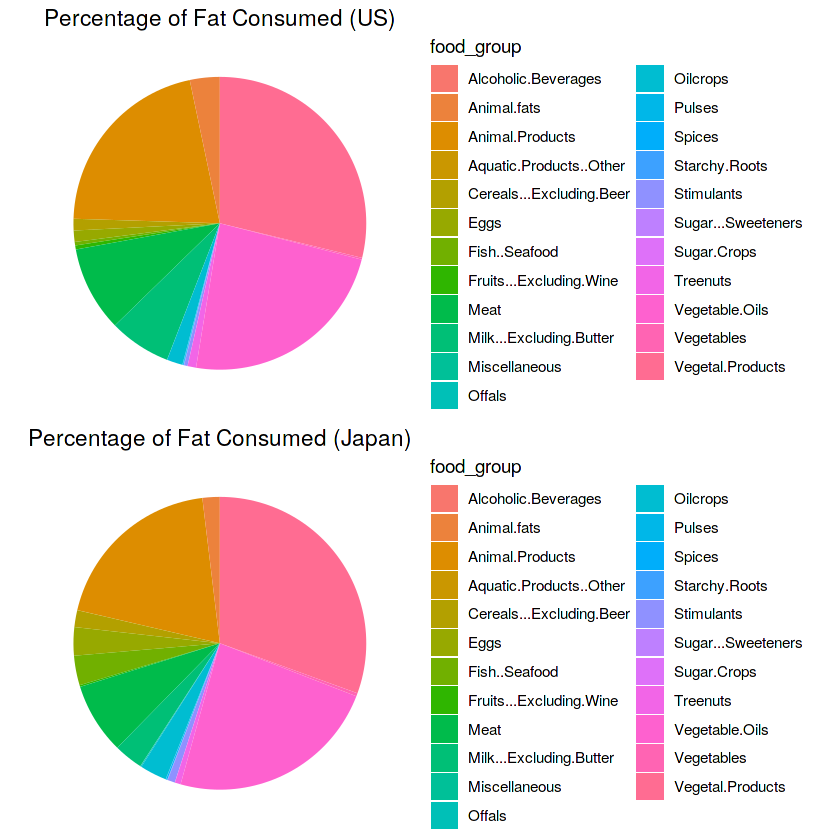

In [ ]:
# Fat consumption from food groups comparison
grid.arrange(us_fat_pie_chart, japan_fat_pie_chart, nrow = 2)

From the pie chart above, it seems like Japan consums more fat from vegetal products than the US, as well as more fat from fish/seafood. Yet US has more fat coming from animal fats, and meat category. But overall, it seems like the difference in each category isn't drastically different between the two countries.

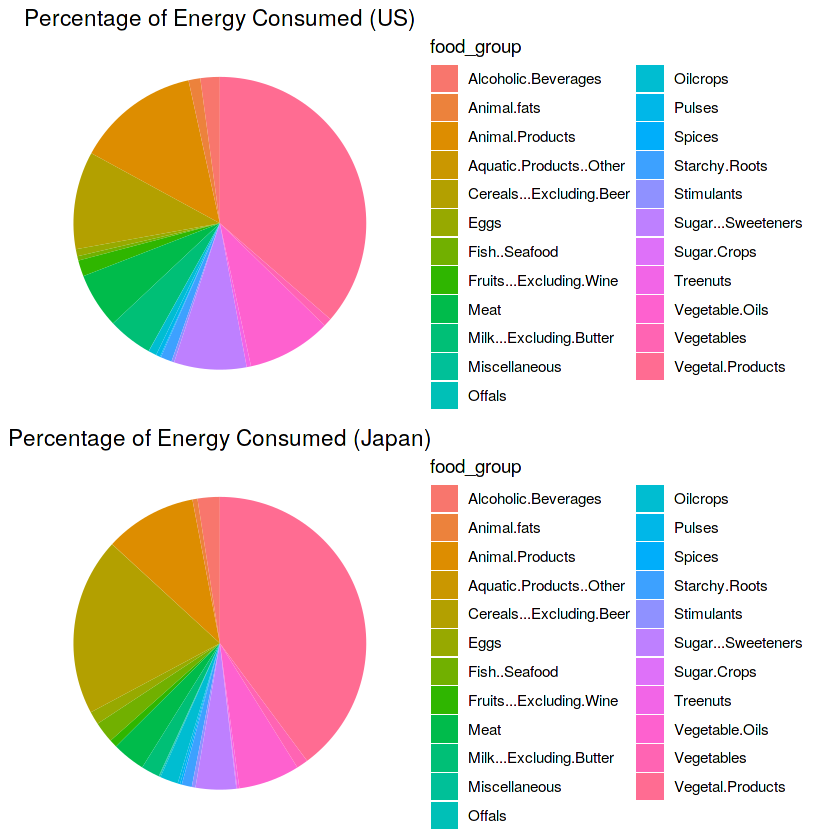

In [ ]:
# Energy consumption from food groups comparison
grid.arrange(us_food_kcal_pie_chart, japan_food_kcal_pie_chart, nrow = 2)

As for the energy consumed (in kilo calories), Japan has slighly higher percentage in the vegetal products category, as well as from the cereals category. Yet US has more energy consumed from the sugar sweeteners category, and animal products category. 

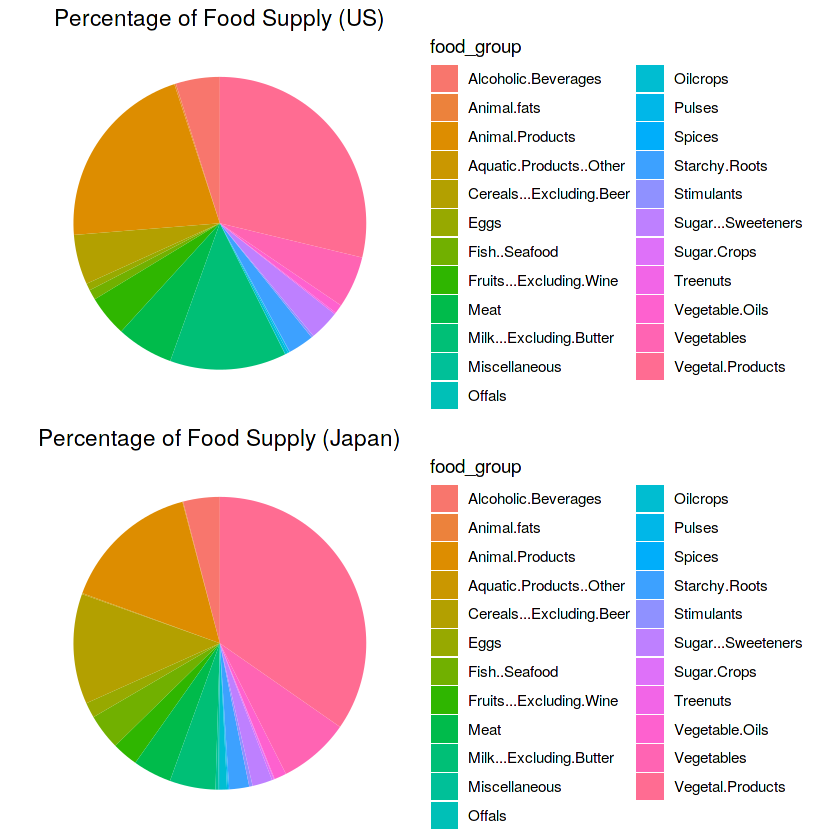

In [ ]:
# Food supply comparison
grid.arrange(us_food_kg_pie_chart, japan_food_kg_pie_chart, nrow = 2)

Looking at the food supply comparison charts, we see that Japan again had more vegetal products available, whereas US - again, has a higher percentage in the sugar sweenteners category, and also in the animal products category. Interestingly, US also has a significantly larger section under the milk category and the fruits section. 

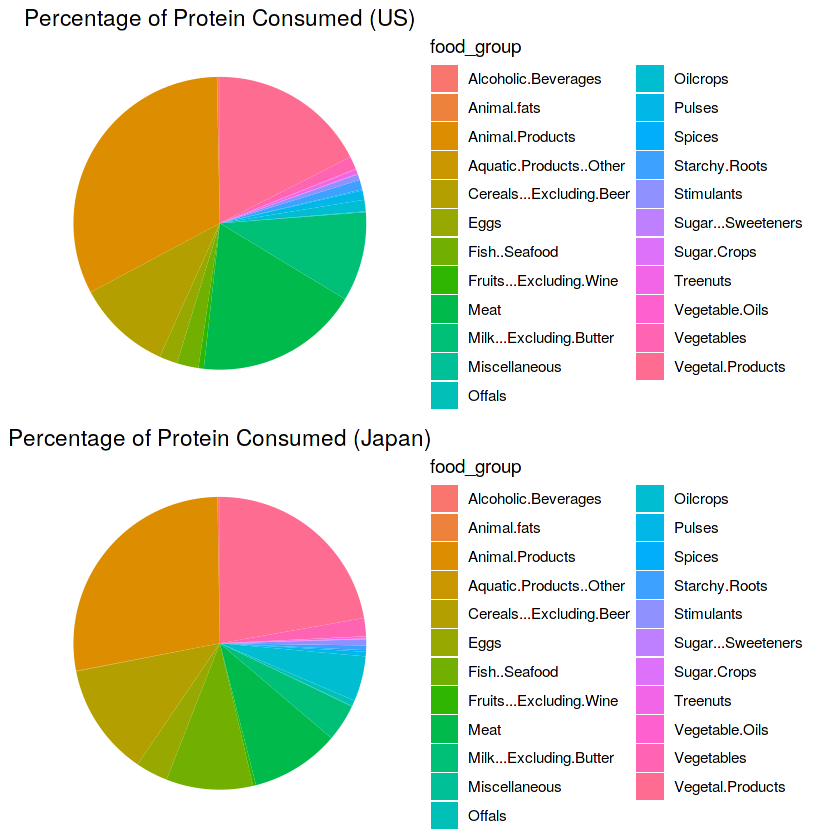

In [ ]:
# Protein consumption from food groups comparison
grid.arrange(us_protein_pie_chart, japan_protein_pie_chart, nrow = 2)

From the protein consumption graph above, we see that US obtains most of its proteins from milk based products and animal products. Japan has a smaller percentage of protein from animal products but a slightly larger percentage from vegetal products, yet a significant larger percentage of proteins obtained from fish and seafood. 

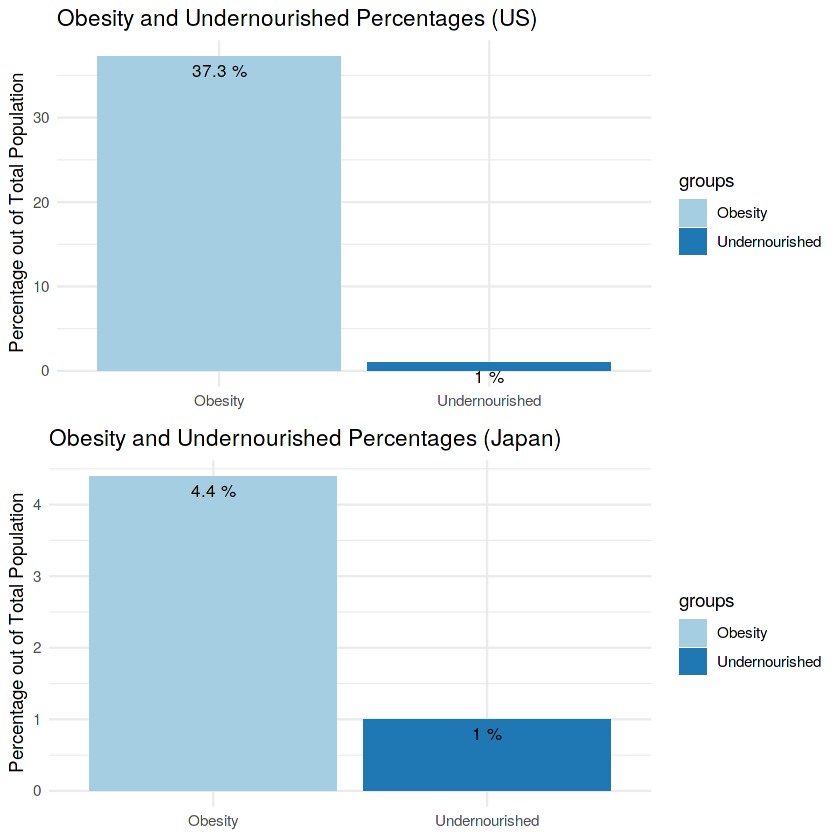

In [ ]:
# Obesity and undernourished rate comparison
grid.arrange(us_obesity_undernourished_bar_plot,japan_obesity_undernourished_bar_plot, nrow = 2)

Looking at the obesity and undernourished rate bar plot above, both US and Japan has very low undernourished rate, yet there is a huge difference between obesity rate - US obesity percentage is almost 10 times the obesity rate in Japan! 

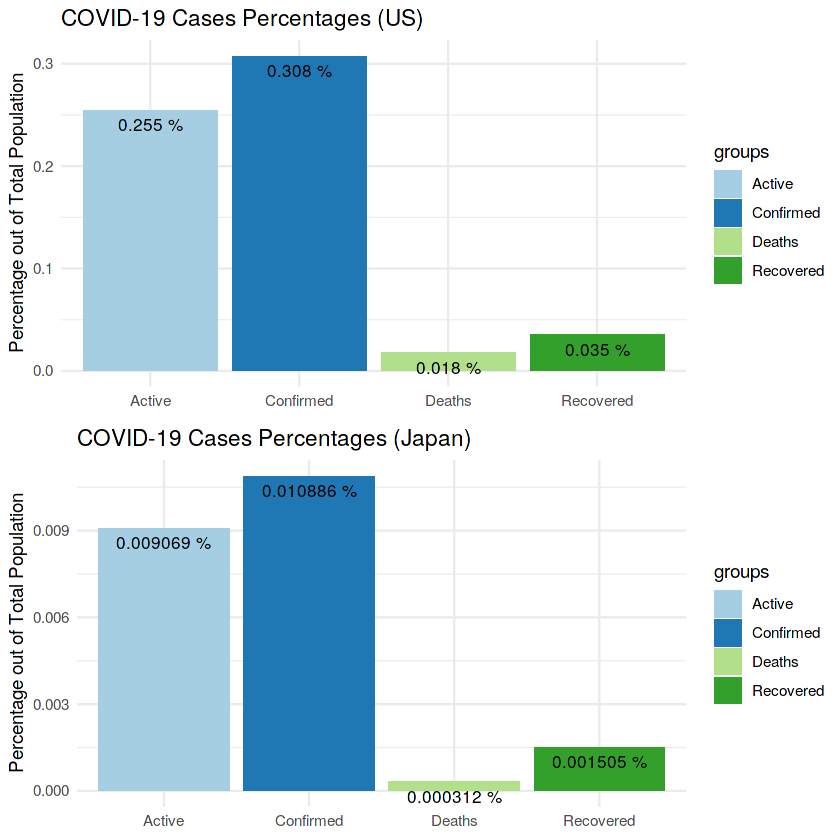

In [ ]:
# COVID cases comparison
grid.arrange(us_covid_cases_bar_plot, japan_covid_cases_bar_plot, nrow = 2)

And lastly, taking a quick look at the percentage of COVID cases. US confirmed cases is 0.255% of its entire population, where Japan has only 0.009% confirmed cases. US also has a higher death percentage than Japan as well. Comparing between percentage recovered and deaths in the bar plots for each country, Japan recovered percentage bar is significantly higher than its deaths percentage bar, where US's recovered percentage bar is only about half way higher than its deaths percentage bar. 

**Conclusion**

After looking through the food patterns in each of the plots above, there are a lot of interesting trends observed:

- US in general consumes a lot of food supplies that are in the sugar/sweenteners, milk, meat, and animal product categories. 
- Japan in general consumes a lot of food supplies that are in the vegetal products and fish/seafood categories. 
- Higher percentage of sugar/sweeteners is probably the reason why US has a significantly higher amount of obesity than Japan.
- Lower amount of vegetal products in the US (which includes plant based food like vegetables etc) is also probabily the reason why Americans have a less healthier diet than Japanese
- US has a higher percentage of COVID-19 infection rate than Japan.

Connecting all the observations above, we can conclude that one of the reasons why Japan has a lower COVID infection rate could be related to the country's dietary choices. Even though there are thousands of other factors that can impact infection rate in either countries, this analysis still proves that adapting to a healthier diet is one of the most important steps we can take to help reduce the amount of COVID cases. 

In order to stay healthy, we need to eat healthy. 